In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import numpy as np

from PIL import Image
import os, glob, numpy as np
import pandas as pd
from sklearn import datasets, model_selection
from sklearn.model_selection import train_test_split

import random
import numpy as np
import os
import cv2
import glob
from PIL import Image
import PIL.ImageOps    


USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [2]:
import random
import numpy as np
import os
import cv2
import glob
from PIL import Image
import PIL.ImageOps    

#다음 변수를 수정하여 새로 만들 이미지 갯수를 정합니다.
num_augmented_images = (825-260)

file_path = './dataset/bad_train/'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

#for i in range(1, num_augmented_images):
    change_picture_index = random.randrange(1, total_origin_image_num-1)
    print(change_picture_index)
    print(file_names[change_picture_index])
    file_name = file_names[change_picture_index]
    
    origin_image_path = './dataset/bad_train/' + file_name
    image = Image.open(origin_image_path)
    random_augment = random.randrange(1,4)
    
    if(random_augment == 1):
        #이미지 좌우 반전
        print("invert")
        inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
        inverted_image.save(file_path + 'inverted_' + str(augment_cnt) + '.jpg')
        
    elif(random_augment == 2):
        #이미지 기울이기
        print("rotate")
        rotated_image = image.rotate(random.randrange(-20, 20))
        rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.jpg')
        
    elif(random_augment == 3):
        #노이즈 추가하기
        img = cv2.imread(origin_image_path)
        print("noise")
        row,col,ch= img.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy_array = img + gauss
        noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
        noisy_image.save(file_path + 'noiseAdded_' + str(augment_cnt) + '.jpg')
        
    augment_cnt += 1

IndentationError: unexpected indent (<ipython-input-2-41b71315f118>, line 18)

In [ ]:
#noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')

In [3]:
img_dir = './dataset'
categories = ['bad_train', 'good_train']
np_classes = len(categories)

X = []
y = []

for idx, cat in enumerate(categories):
    
    img_dir_detail = img_dir + "/" + cat
    files = glob.glob(img_dir_detail+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    
    for i, f in enumerate(files):
        try:
            img = Image.open(f)      #폴더를 열어주고 이미지를 읽음
            img = img.convert("RGB")   #RGB로 바꿈
            resize_img = img.resize((128,128)) #이미지 크기를 모두 학습시키기 쉽게 128x128크기
            
            r, g, b = resize_img.split() # 각 쪼갠 이미지를 255로 나눠서 0~1 사이의 값이 나오도록 정규화한다.
            r_resize_img = np.asarray(np.float32(r) / 255.0)
            b_resize_img = np.asarray(np.float32(g) / 255.0)
            g_resize_img = np.asarray(np.float32(b) / 255.0)
            
            rgb_resize_img = np.asarray([r_resize_img, b_resize_img, g_resize_img]) # 이렇게 가공한 이미지를 추가한다.
            
            X.append(rgb_resize_img)
            y.append(idx) # 라벨 (ant: 0, bee: 1)
            if i % 700 == 0: #700으로 하면 폴더 명과 파일 길이를 더 
                print(cat, " : ", f)
        except:
            print(cat, str(i)+" 번째에서 에러 ")


X = np.array(X, dtype='float32')
y = np.array(y, dtype='int64')
print(y)

#1 0  이면 bad
#0 1  이면 good

print("ok", len(y))

bad_train  파일 길이 :  824
bad_train  :  ./dataset/bad_train/inverted_496.jpg
bad_train  :  ./dataset/bad_train/b_200.jpg
good_train  파일 길이 :  825
good_train  :  ./dataset/good_train/g_418.jpg
good_train  :  ./dataset/good_train/g_198.jpg
[0 0 0 ... 1 1 1]
ok 1649


In [4]:
X_train = X
y_train = y

In [5]:
img_dir = './dataset'
categories = ['bad_test', 'good_test']
np_classes = len(categories)

X = []
y = []

for idx, cat in enumerate(categories):
    
    img_dir_detail = img_dir + "/" + cat
    files = glob.glob(img_dir_detail+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    
    for i, f in enumerate(files):
        try:
            img = Image.open(f)      #폴더를 열어주고 이미지를 읽음
            img = img.convert("RGB")   #RGB로 바꿈
            resize_img = img.resize((128,128)) #이미지 크기를 모두 학습시키기 쉽게 128x128크기
            
            r, g, b = resize_img.split() # 각 쪼갠 이미지를 255로 나눠서 0~1 사이의 값이 나오도록 정규화한다.
            r_resize_img = np.asarray(np.float32(r) / 255.0)
            b_resize_img = np.asarray(np.float32(g) / 255.0)
            g_resize_img = np.asarray(np.float32(b) / 255.0)
            
            rgb_resize_img = np.asarray([r_resize_img, b_resize_img, g_resize_img]) # 이렇게 가공한 이미지를 추가한다.
            
            X.append(rgb_resize_img)
            y.append(idx) # 라벨 (ant: 0, bee: 1)
            if i % 700 == 0: #700으로 하면 폴더 명과 파일 길이를 더 
                print(cat, " : ", f)
        except:
            print(cat, str(i)+" 번째에서 에러 ")


X = np.array(X, dtype='float32')
y = np.array(y, dtype='int64')


#1 0  이면 bad
#0 1  이면 good

print("ok", len(y))

bad_test  파일 길이 :  174
bad_test  :  ./dataset/bad_test/b_302.jpg
good_test  파일 길이 :  554
good_test  :  ./dataset/good_test/g_1271.jpg
ok 728


In [6]:
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.75, shuffle=True)
#stratify=target

In [7]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1649, 3, 128, 128)
(182, 3, 128, 128)
(546, 3, 128, 128)


In [8]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(1649,)
(182,)
(546,)


In [9]:
X_train = torch.from_numpy(X_train).float()
X_val = torch.from_numpy(X_val).float()
X_test = torch.from_numpy(X_test).float()

y_train = torch.from_numpy(y_train).long()
y_val = torch.from_numpy(y_val).long()
y_test = torch.from_numpy(y_test).long()

In [10]:
#TensorDataset을 DataLoader에 전달해서 데이터의 일부만 간단히 추출
train = TensorDataset(X_train, y_train)
val = TensorDataset(X_val, y_val)
test = TensorDataset(X_test, y_test)

#순서로 섞어서 32개씩 데이터를 변환하는 DataLoader 작성
train_loader = DataLoader(train, batch_size=32, shuffle=True, num_workers = 4)
val_loader = DataLoader(val, batch_size=32, shuffle=False, num_workers = 4)
test_loader = DataLoader(test, batch_size=32, shuffle=False, num_workers = 4)

In [11]:
print(len(X_train))
print(len(X_val))
print(len(X_test))

1649
182
546


In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        
        self.pool = nn.MaxPool2d(2, 2, 1)
            
        self.fc1 = nn.Linear(128 * 14 * 14, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 84)
        self.fc4 = nn.Linear(84, 2)
            
        self.dropout1 = nn.Dropout(p=0.5, inplace=False)
            
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.dropout1(x)
        x = self.pool(x)
        #print(x.shape)
        
        x = x.view(x.size(0),-1)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = Net().to(DEVICE)

batch_size = 32

In [13]:
import torch
import torchvision
import torchsummary
model = Net().to(DEVICE)
print(model)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=2, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
)


In [14]:
from torchsummary import summary
summary(model, input_size=(3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 124, 124]           2,432
         MaxPool2d-2           [-1, 32, 63, 63]               0
            Conv2d-3           [-1, 64, 59, 59]          51,264
         MaxPool2d-4           [-1, 64, 30, 30]               0
            Conv2d-5          [-1, 128, 26, 26]         204,928
           Dropout-6          [-1, 128, 26, 26]               0
         MaxPool2d-7          [-1, 128, 14, 14]               0
            Linear-8                  [-1, 256]       6,422,784
           Dropout-9                  [-1, 256]               0
           Linear-10                  [-1, 128]          32,896
           Linear-11                   [-1, 84]          10,836
           Linear-12                    [-1, 2]             170
Total params: 6,725,310
Trainable params: 6,725,310
Non-trainable params: 0
---------------------------

In [15]:
# https://hoya012.github.io/blog/DenseNet-Tutorial-2/
num_epoch = 500
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

total = 0
correct = 0
running_loss_history = []
running_correct_history = []
validation_running_loss_history = []
validation_running_correct_history = []


for epoch in range(num_epoch):  
    epoch = epoch+1
    total = 0
    running_correct = 0.0
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        X_train, y_train = data
        X_train, y_train = X_train.to(DEVICE), y_train.to(DEVICE)

        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() #손실이 갖고 있는 스칼라 값을 가져올 수 있습니다.
       
        _, predicted = torch.max(outputs.data, 1)
        total += y_train.size(0)
        running_correct += (predicted == y_train).sum().item()
       # a = torch.tensor(torch.sum(predicted == y_train).item() / len(predicted))
    
    
    # validation part
    val_total = 0
    validation_running_loss = 0.0
    validation_running_correct = 0.0
    
    for i, data in enumerate(val_loader, 0):
        X_val, y_val = data
        X_val, y_val = X_val.to(DEVICE), y_val.to(DEVICE)
        outputs = model(X_val)
        
        val_loss = criterion(outputs, y_val) 
        validation_running_loss += val_loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        val_total += y_val.size(0)
        validation_running_correct += (predicted == y_val).sum().item()
        
        
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_correct / len(train_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_correct_history.append(epoch_acc)

    val_epoch_loss = validation_running_loss / len(val_loader.dataset)
    val_epoch_acc = validation_running_correct / len(val_loader.dataset)
    validation_running_loss_history.append(val_epoch_loss)
    validation_running_correct_history.append(val_epoch_acc)
    
    print(epoch,"epoch")
    print("training loss: {:.5f}, acc: {:5f}".format(epoch_loss, epoch_acc*100))
    print("validation loss: {:.5f}, acc: {:5f}".format(val_epoch_loss, val_epoch_acc*100))
    
    print('---------------------------------------------------------------------') 

print('Finished Training')

1 epoch
training loss: 0.02150, acc: 55.973317
validation loss: 0.01563, acc: 75.824176
---------------------------------------------------------------------
2 epoch
training loss: 0.01637, acc: 73.499090
validation loss: 0.01162, acc: 84.065934
---------------------------------------------------------------------
3 epoch
training loss: 0.01271, acc: 80.836871
validation loss: 0.01288, acc: 84.615385
---------------------------------------------------------------------
4 epoch
training loss: 0.01263, acc: 80.836871
validation loss: 0.01452, acc: 85.164835
---------------------------------------------------------------------
5 epoch
training loss: 0.01189, acc: 83.444512
validation loss: 0.01135, acc: 85.714286
---------------------------------------------------------------------
6 epoch
training loss: 0.01131, acc: 84.354154
validation loss: 0.01123, acc: 85.714286
---------------------------------------------------------------------
7 epoch
training loss: 0.01152, acc: 83.444512
valid

53 epoch
training loss: 0.00216, acc: 97.149788
validation loss: 0.01322, acc: 87.362637
---------------------------------------------------------------------
54 epoch
training loss: 0.00262, acc: 97.149788
validation loss: 0.01258, acc: 86.263736
---------------------------------------------------------------------
55 epoch
training loss: 0.00124, acc: 98.605215
validation loss: 0.01190, acc: 90.659341
---------------------------------------------------------------------
56 epoch
training loss: 0.00087, acc: 98.726501
validation loss: 0.01756, acc: 87.362637
---------------------------------------------------------------------
57 epoch
training loss: 0.00138, acc: 98.787144
validation loss: 0.01174, acc: 90.659341
---------------------------------------------------------------------
58 epoch
training loss: 0.00119, acc: 98.665858
validation loss: 0.01225, acc: 87.362637
---------------------------------------------------------------------
59 epoch
training loss: 0.00086, acc: 98.84778

105 epoch
training loss: 0.00081, acc: 99.393572
validation loss: 0.01184, acc: 92.857143
---------------------------------------------------------------------
106 epoch
training loss: 0.00084, acc: 99.029715
validation loss: 0.02015, acc: 89.010989
---------------------------------------------------------------------
107 epoch
training loss: 0.00012, acc: 99.878714
validation loss: 0.02099, acc: 93.406593
---------------------------------------------------------------------
108 epoch
training loss: 0.00052, acc: 99.454215
validation loss: 0.01978, acc: 92.307692
---------------------------------------------------------------------
109 epoch
training loss: 0.00193, acc: 98.302001
validation loss: 0.01671, acc: 91.758242
---------------------------------------------------------------------
110 epoch
training loss: 0.00055, acc: 99.575500
validation loss: 0.02050, acc: 91.208791
---------------------------------------------------------------------
111 epoch
training loss: 0.00062, acc: 9

157 epoch
training loss: 0.00114, acc: 98.969072
validation loss: 0.00721, acc: 91.208791
---------------------------------------------------------------------
158 epoch
training loss: 0.00020, acc: 99.757429
validation loss: 0.01761, acc: 92.307692
---------------------------------------------------------------------
159 epoch
training loss: 0.00036, acc: 99.575500
validation loss: 0.01839, acc: 92.857143
---------------------------------------------------------------------
160 epoch
training loss: 0.00079, acc: 99.393572
validation loss: 0.02048, acc: 92.307692
---------------------------------------------------------------------
161 epoch
training loss: 0.00005, acc: 99.939357
validation loss: 0.05379, acc: 87.362637
---------------------------------------------------------------------
162 epoch
training loss: 0.00042, acc: 99.636143
validation loss: 0.02227, acc: 92.307692
---------------------------------------------------------------------
163 epoch
training loss: 0.00023, acc: 9

209 epoch
training loss: 0.00019, acc: 99.575500
validation loss: 0.01441, acc: 91.758242
---------------------------------------------------------------------
210 epoch
training loss: 0.00062, acc: 99.211643
validation loss: 0.01931, acc: 89.010989
---------------------------------------------------------------------
211 epoch
training loss: 0.00030, acc: 99.818072
validation loss: 0.03005, acc: 91.758242
---------------------------------------------------------------------
212 epoch
training loss: 0.00024, acc: 99.757429
validation loss: 0.01760, acc: 94.505495
---------------------------------------------------------------------
213 epoch
training loss: 0.00041, acc: 99.818072
validation loss: 0.02827, acc: 87.912088
---------------------------------------------------------------------
214 epoch
training loss: 0.00030, acc: 99.878714
validation loss: 0.02771, acc: 91.758242
---------------------------------------------------------------------
215 epoch
training loss: 0.00021, acc: 9

261 epoch
training loss: 0.00048, acc: 99.636143
validation loss: 0.02860, acc: 92.307692
---------------------------------------------------------------------
262 epoch
training loss: 0.00038, acc: 99.757429
validation loss: 0.02359, acc: 93.406593
---------------------------------------------------------------------
263 epoch
training loss: 0.00014, acc: 99.878714
validation loss: 0.03221, acc: 92.307692
---------------------------------------------------------------------
264 epoch
training loss: 0.00010, acc: 99.878714
validation loss: 0.03703, acc: 90.659341
---------------------------------------------------------------------
265 epoch
training loss: 0.00006, acc: 99.878714
validation loss: 0.03438, acc: 90.659341
---------------------------------------------------------------------
266 epoch
training loss: 0.00003, acc: 99.939357
validation loss: 0.03956, acc: 92.857143
---------------------------------------------------------------------
267 epoch
training loss: 0.00000, acc: 1

313 epoch
training loss: 0.00029, acc: 99.757429
validation loss: 0.02492, acc: 90.659341
---------------------------------------------------------------------
314 epoch
training loss: 0.00005, acc: 99.939357
validation loss: 0.02444, acc: 91.758242
---------------------------------------------------------------------
315 epoch
training loss: 0.00005, acc: 99.939357
validation loss: 0.02934, acc: 91.758242
---------------------------------------------------------------------
316 epoch
training loss: 0.00004, acc: 99.939357
validation loss: 0.03896, acc: 92.307692
---------------------------------------------------------------------
317 epoch
training loss: 0.00013, acc: 99.878714
validation loss: 0.03105, acc: 90.109890
---------------------------------------------------------------------
318 epoch
training loss: 0.00001, acc: 100.000000
validation loss: 0.02596, acc: 91.758242
---------------------------------------------------------------------
319 epoch
training loss: 0.00002, acc: 

365 epoch
training loss: 0.00025, acc: 99.878714
validation loss: 0.02849, acc: 90.659341
---------------------------------------------------------------------
366 epoch
training loss: 0.00033, acc: 99.757429
validation loss: 0.01828, acc: 90.109890
---------------------------------------------------------------------
367 epoch
training loss: 0.00019, acc: 99.818072
validation loss: 0.01518, acc: 93.406593
---------------------------------------------------------------------
368 epoch
training loss: 0.00002, acc: 100.000000
validation loss: 0.02478, acc: 92.857143
---------------------------------------------------------------------
369 epoch
training loss: 0.00034, acc: 99.514857
validation loss: 0.01596, acc: 93.406593
---------------------------------------------------------------------
370 epoch
training loss: 0.00015, acc: 99.757429
validation loss: 0.01474, acc: 93.406593
---------------------------------------------------------------------
371 epoch
training loss: 0.00067, acc: 

417 epoch
training loss: 0.00009, acc: 99.939357
validation loss: 0.01664, acc: 91.758242
---------------------------------------------------------------------
418 epoch
training loss: 0.00003, acc: 100.000000
validation loss: 0.01887, acc: 92.307692
---------------------------------------------------------------------
419 epoch
training loss: 0.00003, acc: 99.939357
validation loss: 0.01828, acc: 91.208791
---------------------------------------------------------------------
420 epoch
training loss: 0.00016, acc: 99.878714
validation loss: 0.01542, acc: 93.406593
---------------------------------------------------------------------
421 epoch
training loss: 0.00002, acc: 100.000000
validation loss: 0.02403, acc: 91.208791
---------------------------------------------------------------------
422 epoch
training loss: 0.00004, acc: 99.939357
validation loss: 0.02693, acc: 93.406593
---------------------------------------------------------------------
423 epoch
training loss: 0.00001, acc:

469 epoch
training loss: 0.00000, acc: 100.000000
validation loss: 0.02407, acc: 91.758242
---------------------------------------------------------------------
470 epoch
training loss: 0.00002, acc: 99.939357
validation loss: 0.02216, acc: 92.857143
---------------------------------------------------------------------
471 epoch
training loss: 0.00002, acc: 100.000000
validation loss: 0.03328, acc: 90.109890
---------------------------------------------------------------------
472 epoch
training loss: 0.00002, acc: 99.939357
validation loss: 0.02159, acc: 91.758242
---------------------------------------------------------------------
473 epoch
training loss: 0.00001, acc: 100.000000
validation loss: 0.03554, acc: 92.307692
---------------------------------------------------------------------
474 epoch
training loss: 0.00002, acc: 99.939357
validation loss: 0.03320, acc: 92.307692
---------------------------------------------------------------------
475 epoch
training loss: 0.00027, acc

In [16]:
import matplotlib.pyplot as plt
def plot_acc(train_losses, valid_losses):
    '''
    training과 validation loss를 시각화하는 함수
    '''
    
    # plot style을 seaborn으로 설정
    plt.style.use('seaborn')
    
    train_losses = np.array(train_losses) 
    valid_losses = np.array(valid_losses)

    fig, ax = plt.subplots(figsize = (8, 4.5))

    ax.plot(train_losses, color='blue', label='Training accuracy') 
    ax.plot(valid_losses, color='red', label='Validation accuracy')
    ax.set(title="Accuracy over epochs", 
            xlabel='Epoch',
            ylabel='Accuracy') 
    ax.legend()
    fig.show()
    
    # plot style을 기본값으로 설정
    plt.style.use('default')

In [17]:
def plot_loss(train_losses, valid_losses):
    '''
    training과 validation loss를 시각화하는 함수
    '''
    
    # plot style을 seaborn으로 설정
    plt.style.use('seaborn')

    train_losses = list(np.array(train_losses))
    valid_losses = list(np.array(valid_losses))

    fig, ax = plt.subplots(figsize = (8, 4.5))

    ax.plot(train_losses, color='blue', label='Training loss') 
    ax.plot(valid_losses, color='red', label='Validation loss')
    ax.set(title="Loss over epochs", 
            xlabel='Epoch',
            ylabel='Loss') 
    ax.legend()
    fig.show()
    
    # plot style을 기본값으로 설정
    plt.style.use('default')

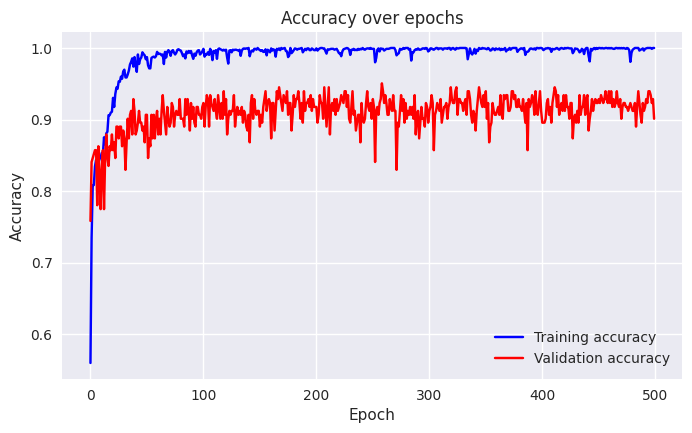

In [20]:
plot_acc(running_correct_history, validation_running_correct_history)

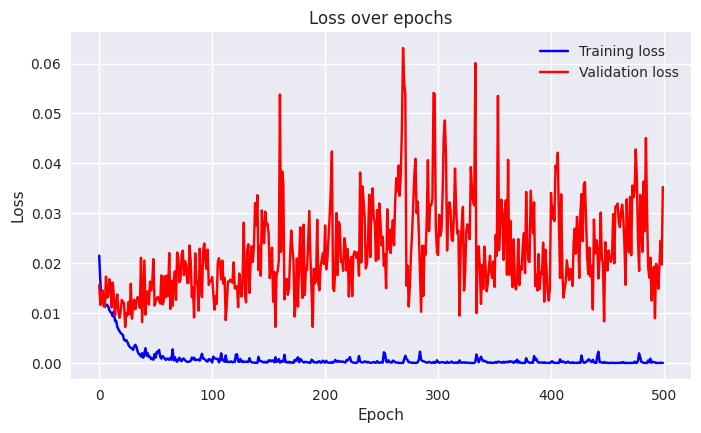

In [21]:
plot_loss(running_loss_history, validation_running_loss_history)

In [22]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

for epoch in range(num_epoch): 

    correct = 0
    total = 0
    test_loss = 0.0

    with torch.no_grad():
        for data in test_loader:
            X_test, y_test = data
            X_test, y_test = X_test.to(DEVICE), y_test.to(DEVICE)
            outputs = model(X_test)
            
            
            test_loss += F.cross_entropy(outputs, y_test, reduction='sum').item()
            
            _, predicted = torch.max(outputs, 1)
            c = (predicted == y_test).squeeze()
            
            for i in range(y_test.shape[0]):
                label = y_test[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
            
                total += y_test.size(0)
                correct += (predicted == y_test).sum().item()
                
            
        test_loss /= len(test_loader.dataset)
        print('[%d epoch] Test Accuracy: %d %%' % (epoch + 1, 100 * correct / total),', Loss:{:.4f}'.format(test_loss))
        print("Test Accuracy Accuracy : {:.5f}".format( 100 * correct / total))
                      

   
print('Accuracy of the network on the 1813 test images: %d %%' % (
    100 * correct / total)) 

for i in range(2):
    #print('Accuracy of %5s : %2d %%' % (
    print('Accuracy of %5s : %2d %%' % (
        categories[i], 100 * class_correct[i] / class_total[i]))
    print(categories[i], 100 * class_correct[i] / class_total[i])


[1 epoch] Test Accuracy: 91 % , Loss:1.0039
Test Accuracy Accuracy : 91.17850
[2 epoch] Test Accuracy: 91 % , Loss:0.9099
Test Accuracy Accuracy : 91.54606
[3 epoch] Test Accuracy: 92 % , Loss:0.8848
Test Accuracy Accuracy : 92.45348
[4 epoch] Test Accuracy: 92 % , Loss:0.9778
Test Accuracy Accuracy : 92.09740
[5 epoch] Test Accuracy: 91 % , Loss:0.9214
Test Accuracy Accuracy : 91.16701
[6 epoch] Test Accuracy: 92 % , Loss:0.9667
Test Accuracy Accuracy : 92.64875
[7 epoch] Test Accuracy: 92 % , Loss:0.9635
Test Accuracy Accuracy : 92.64875
[8 epoch] Test Accuracy: 91 % , Loss:0.9885
Test Accuracy Accuracy : 91.17850
[9 epoch] Test Accuracy: 93 % , Loss:0.9050
Test Accuracy Accuracy : 93.01631
[10 epoch] Test Accuracy: 90 % , Loss:0.9357
Test Accuracy Accuracy : 90.62715
[11 epoch] Test Accuracy: 91 % , Loss:1.1499
Test Accuracy Accuracy : 91.17850
[12 epoch] Test Accuracy: 91 % , Loss:0.9935
Test Accuracy Accuracy : 91.72984
[13 epoch] Test Accuracy: 92 % , Loss:1.0432
Test Accuracy Ac

[105 epoch] Test Accuracy: 91 % , Loss:0.9581
Test Accuracy Accuracy : 91.91362
[106 epoch] Test Accuracy: 92 % , Loss:1.0944
Test Accuracy Accuracy : 92.28119
[107 epoch] Test Accuracy: 90 % , Loss:0.8971
Test Accuracy Accuracy : 90.44337
[108 epoch] Test Accuracy: 90 % , Loss:1.0598
Test Accuracy Accuracy : 90.79945
[109 epoch] Test Accuracy: 90 % , Loss:1.0440
Test Accuracy Accuracy : 90.98323
[110 epoch] Test Accuracy: 91 % , Loss:0.8712
Test Accuracy Accuracy : 91.17850
[111 epoch] Test Accuracy: 91 % , Loss:0.9428
Test Accuracy Accuracy : 91.72984
[112 epoch] Test Accuracy: 92 % , Loss:0.8240
Test Accuracy Accuracy : 92.28119
[113 epoch] Test Accuracy: 92 % , Loss:0.9071
Test Accuracy Accuracy : 92.45348
[114 epoch] Test Accuracy: 92 % , Loss:1.0272
Test Accuracy Accuracy : 92.46497
[115 epoch] Test Accuracy: 91 % , Loss:0.9992
Test Accuracy Accuracy : 91.72984
[116 epoch] Test Accuracy: 92 % , Loss:0.9016
Test Accuracy Accuracy : 92.28119
[117 epoch] Test Accuracy: 91 % , Loss:0

[208 epoch] Test Accuracy: 92 % , Loss:1.0314
Test Accuracy Accuracy : 92.09740
[209 epoch] Test Accuracy: 91 % , Loss:1.0140
Test Accuracy Accuracy : 91.90214
[210 epoch] Test Accuracy: 91 % , Loss:1.0590
Test Accuracy Accuracy : 91.54606
[211 epoch] Test Accuracy: 91 % , Loss:0.8229
Test Accuracy Accuracy : 91.54606
[212 epoch] Test Accuracy: 91 % , Loss:1.0445
Test Accuracy Accuracy : 91.17850
[213 epoch] Test Accuracy: 91 % , Loss:1.0182
Test Accuracy Accuracy : 91.17850
[214 epoch] Test Accuracy: 92 % , Loss:0.9747
Test Accuracy Accuracy : 92.09740
[215 epoch] Test Accuracy: 92 % , Loss:0.9826
Test Accuracy Accuracy : 92.08592
[216 epoch] Test Accuracy: 92 % , Loss:0.8969
Test Accuracy Accuracy : 92.09740
[217 epoch] Test Accuracy: 91 % , Loss:0.9313
Test Accuracy Accuracy : 91.72984
[218 epoch] Test Accuracy: 92 % , Loss:0.9295
Test Accuracy Accuracy : 92.09740
[219 epoch] Test Accuracy: 91 % , Loss:0.9831
Test Accuracy Accuracy : 91.54606
[220 epoch] Test Accuracy: 92 % , Loss:0

[311 epoch] Test Accuracy: 90 % , Loss:0.9528
Test Accuracy Accuracy : 90.06432
[312 epoch] Test Accuracy: 91 % , Loss:1.0101
Test Accuracy Accuracy : 91.53457
[313 epoch] Test Accuracy: 92 % , Loss:1.1554
Test Accuracy Accuracy : 92.28119
[314 epoch] Test Accuracy: 92 % , Loss:1.1089
Test Accuracy Accuracy : 92.08592
[315 epoch] Test Accuracy: 91 % , Loss:0.9980
Test Accuracy Accuracy : 91.91362
[316 epoch] Test Accuracy: 91 % , Loss:0.8960
Test Accuracy Accuracy : 91.71836
[317 epoch] Test Accuracy: 91 % , Loss:0.9970
Test Accuracy Accuracy : 91.36228
[318 epoch] Test Accuracy: 92 % , Loss:0.9256
Test Accuracy Accuracy : 92.28119
[319 epoch] Test Accuracy: 91 % , Loss:1.0400
Test Accuracy Accuracy : 91.54606
[320 epoch] Test Accuracy: 92 % , Loss:1.0954
Test Accuracy Accuracy : 92.64875
[321 epoch] Test Accuracy: 91 % , Loss:0.9770
Test Accuracy Accuracy : 91.90214
[322 epoch] Test Accuracy: 91 % , Loss:0.8717
Test Accuracy Accuracy : 91.91362
[323 epoch] Test Accuracy: 91 % , Loss:1

[414 epoch] Test Accuracy: 92 % , Loss:1.0482
Test Accuracy Accuracy : 92.26970
[415 epoch] Test Accuracy: 90 % , Loss:0.8856
Test Accuracy Accuracy : 90.81093
[416 epoch] Test Accuracy: 92 % , Loss:0.8978
Test Accuracy Accuracy : 92.63726
[417 epoch] Test Accuracy: 92 % , Loss:1.0414
Test Accuracy Accuracy : 92.46497
[418 epoch] Test Accuracy: 93 % , Loss:0.8288
Test Accuracy Accuracy : 93.38387
[419 epoch] Test Accuracy: 91 % , Loss:0.8515
Test Accuracy Accuracy : 91.36228
[420 epoch] Test Accuracy: 91 % , Loss:0.8852
Test Accuracy Accuracy : 91.72984
[421 epoch] Test Accuracy: 92 % , Loss:0.9511
Test Accuracy Accuracy : 92.26970
[422 epoch] Test Accuracy: 92 % , Loss:0.8820
Test Accuracy Accuracy : 92.28119
[423 epoch] Test Accuracy: 92 % , Loss:1.0395
Test Accuracy Accuracy : 92.09740
[424 epoch] Test Accuracy: 92 % , Loss:1.0749
Test Accuracy Accuracy : 92.64875
[425 epoch] Test Accuracy: 92 % , Loss:0.9752
Test Accuracy Accuracy : 92.09740
[426 epoch] Test Accuracy: 92 % , Loss:0

In [23]:
from ignite.metrics import Accuracy, Precision, Recall

def thresholded_output_transform(output):
    y_pred, y = output
    y_pred = torch.round(y_pred)
    return y_pred, y

binary_accuracy = Accuracy(thresholded_output_transform)
precision = Precision(thresholded_output_transform)
recall = Recall(thresholded_output_transform)

In [24]:
def CalculateMetrics(model):
    with torch.no_grad():
        for images, labels in test_loader:
            if USE_CUDA:
                images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            binary_accuracy.update((predicted, labels))
            precision.update((predicted, labels))
            recall.update((predicted, labels))
            
        print('Model accuracy : ', binary_accuracy.compute())
        print('Model Precision : ', precision.compute().item())
        print('Model Recall : ', recall.compute().item())

In [25]:
CalculateMetrics(model)

Model accuracy :  0.9230769230769231
Model Precision :  0.9310344827586207
Model Recall :  0.9712230215827338


In [ ]:
def CalculateMetrics(model):
    with torch.no_grad():
        for images, labels in test_loader:
            if USE_CUDA:
                images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            binary_accuracy.update((predicted, labels))
            precision.update((predicted, labels))
            recall.update((predicted, labels))
            
        print('Model accuracy : ', binary_accuracy.compute())
        print('Model Precision : ', precision.compute().item())
        print('Model Recall : ', recall.compute().item())

In [ ]:
F1 = (precision * recall * 2 / (precision + recall)).mean()